In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [15]:
df_pong_v1 = pd.read_csv('experiments/Pong-v1/df_results.csv')
df_pong_v1.shape

(1040, 7)

In [16]:
df_pong = pd.read_csv('experiments/Pong/df_results.csv')
df_pong.shape

(446, 7)

In [22]:
df_pong_v1.head()

,REWARD,TRAIN,TIME,LOSS,EXPLORATION_RATE,FPS,LR,MEAN_REWARDS
0,-20.0,1176.0,1.643772e+09,0.001247,0.98924,15,0.000090,-20.000000
1,-21.0,2389.0,1.643772e+09,0.001454,0.97711,15,0.000090,-20.500000
2,-21.0,3495.0,1.643772e+09,0.001427,0.96605,15,0.000089,-20.666667
3,-21.0,4747.0,1.643772e+09,0.001138,0.95353,14,0.000089,-20.750000
4,-21.0,5939.0,1.643772e+09,0.000991,0.94161,15,0.000088,-20.800000


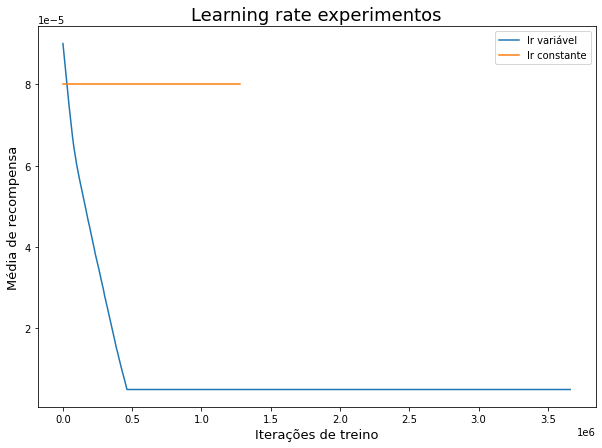

In [46]:
plt.figure(figsize=(10,7))
plt.plot(df_pong_v1['TRAIN'], df_pong_v1['LR'], label='lr variável')
plt.plot(df_pong['TRAIN'], df_pong['LR'], label='lr constante')
plt.xlabel('Iterações de treino', fontsize=13)
plt.ylabel('Média de recompensa', fontsize=13)
plt.title('Learning rate experimentos', fontsize=18)
plt.legend()

### Ajustar informações de recompensas em uma escala mais linear

In [19]:
def norm(n):
    0 if n<0 else n
    
mean_rewards_pong = []
mean_rewards_pong_v1 = []
interval=50
for i in range(df_pong_v1.shape[0]):
    mean_rewards_pong_v1.append(df_pong_v1.loc[norm(i-interval):i, 'REWARD'].mean())
    
for i in range(df_pong.shape[0]):
    mean_rewards_pong.append(df_pong.loc[norm(i-interval):i, 'REWARD'].mean())
    
df_pong_v1['MEAN_REWARDS'] = mean_rewards_pong_v1
df_pong['MEAN_REWARDS'] = mean_rewards_pong

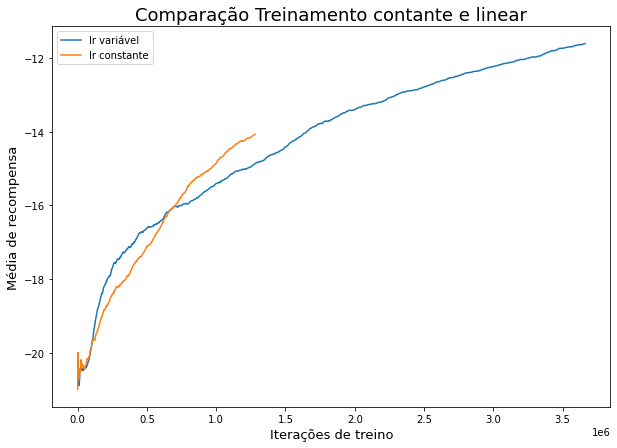

In [47]:

plt.figure(figsize=(10,7))
plt.plot(df_pong_v1['TRAIN'], df_pong_v1['MEAN_REWARDS'], label='lr variável')
plt.plot(df_pong['TRAIN'], df_pong['MEAN_REWARDS'], label='lr constante')
plt.xlabel('Iterações de treino', fontsize=13)
plt.ylabel('Média de recompensa', fontsize=13)
plt.title('Comparação Treinamento contante e linear', fontsize=18)
plt.legend()

In [54]:
# Tempo gasto para os experimentos.

print('Tempo - Experimento variável: {}'.format( (df_pong_v1['TIME'].iloc[-1] - df_pong_v1['TIME'].iloc[0]) / (60*60) ))
print('Tempo - Experimento constante: {}'.format( (df_pong['TIME'].iloc[-1] - df_pong['TIME'].iloc[0]) / (60*60) ))

Tempo - Experimento variável: 69.93621536778079
Tempo - Experimento constante: 24.445828324953716


In [7]:
start = list(df_results['TIME'])[0]
end = list(df_results['TIME'])[-1]

In [ ]:
((end - start) / 60) / 60

In [ ]:
plt.plot(df_results['REWARD'])